# Convolutional Neural Networks (CNN)

- Convolutional neural networks leverage spatial information, making them good for classifying images.

## Deep Convolutional Neural networks

- Deep Convolutional Neural Network (DCNN) consists of man neural network layers.

### local receptive fields

- To perserve spatial information of an image, it is often convenient to represent each image with a matrix of pixels.
- Ti accinokusg a sunoke wat ti accinokusg us ti ebcide tge kycal structure into a submatrix of adjacent input neurons.

### Shared weights and bias
### A mathematical example
### ConvNets in TensorFlow

- Add convolutional layer with 32 parallel features and filter

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

2024-07-02 02:35:23.249993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 02:35:23.250018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 02:35:23.250714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 02:35:23.256077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 02:35:24.955112: E external/local_xla/xla/

### Pooling layers
- Summarize the output of a feature map.

### Max pooling
- Max pooling operator, it outputs the maximum activation as observed in the region

In [3]:
model.add(layers.MaxPooling2D((2, 2)))

### Average pooling
- Another choice is to aggregate the region into the average of the values.

### An example of DCNN: LeNet
- Another example of the MNIST dataset, but using convolution.  LeNet has lower layers alternating convolution operations with max-pooling operations.

In [8]:
## to define a LeNet, we will use layers.Convolution2D.
##     where the first parameter is the number of output filters, and the next
##     tuble is the extension for each filter.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10 # number of output = number of digits

## Define the LeNet network
class LeNet:
    def build(input_shape, classes):
        model = models.Sequential()
    
        ## Max pooling implements a sliding window, over the layer and takes maximum
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu',
                                      input_shape=input_shape))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
        ##Add second convolution stage
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
        ## Flatten and run a standard dense network
        # Flatten => RELU Layers
        model.add(layers.Flatten())
        model.add(layers.Dense(500, activation='relu'))
        # a softmax classifier
        model.add(layers.Dense(classes, activation='softmax'))
        return model    

In [10]:
## Train the network
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert class vectors to binary class matices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# intalize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
              metrics=["accuracy"])
model.summary()

# I've had the damndest time getting tensorboard to work, skipping
#callbacks = [
#    # Write TensorBoard logs to './logs' directory
#    tf.keras.callbacks.TensorBoard(log_dir='./logs')
#]

# fit
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
                    #callbacks=callbacks)
                   )

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score: ", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 50)        1300      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 50)          62550     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

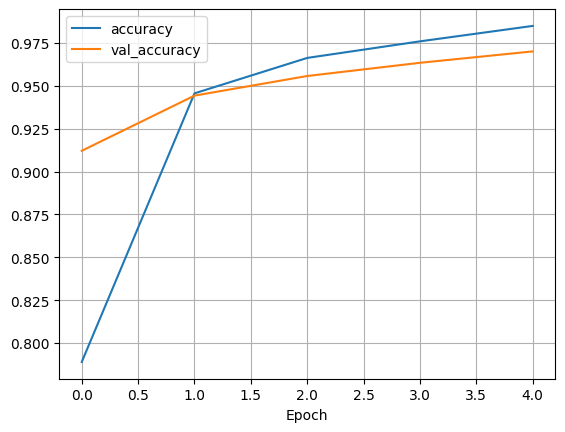

In [15]:
import matplotlib.pyplot as plt

#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()